# 자연어 처리

## 토큰화

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
# 문장 토큰화
text_sample='hello world! Steve Jobs. 줄리어스 로버트 오펜하이머. 김한경'
from nltk import sent_tokenize
sentences=sent_tokenize(text_sample)
print(sentences)

['hello world!', 'Steve Jobs.', '줄리어스 로버트 오펜하이머.', '김한경']


In [44]:
# 단어 토큰화
sentence='김한경 바보 멍청이 오마카세 먹을 수 있겠냐? ㅎㅎ 찾아보고는 있지?'
from nltk import word_tokenize

words=word_tokenize(sentence)
print(words)

['김한경', '바보', '멍청이', '오마카세', '먹을', '수', '있겠냐', '?', 'ㅎㅎ', '찾아보고는', '있지', '?']


# stopword 제거

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
print('불용어 개수', len(nltk.corpus.stopwords.words('english')))
print('불용어 :', (nltk.corpus.stopwords.words('english'))[:50])

불용어 개수 179
불용어 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


In [47]:
# 불용어 추가 가능. 		
stopwords=nltk.corpus.stopwords.words('english') # type : list
stopwords.append('jobs')
print("불용어 개수: ",len(stopwords))

불용어 개수:  180


In [48]:
text_sample='I Love you hello world! Steve Jobs. 줄리어스 로버트 오펜하이머. 김한경'
sentences=sent_tokenize(text_sample) # 문장별로 끊기
wordtokens=[word_tokenize(sentence) for sentence in sentences] # 각 문장을 단어로 쪼개기
print(wordtokens)

# 불용어 제거
all_tokens=[]


# 영문의 경우 대소문자 구별을 항상 신경쓸것. 
for sentence in wordtokens:
	filtered_words=[]
	for word in sentence:
		word=word.lower()
		if word not in stopwords:
			filtered_words.append(word)
	all_tokens.append(filtered_words)

print(all_tokens)

[['I', 'Love', 'you', 'hello', 'world', '!'], ['Steve', 'Jobs', '.'], ['줄리어스', '로버트', '오펜하이머', '.'], ['김한경']]
[['love', 'hello', 'world', '!'], ['steve', '.'], ['줄리어스', '로버트', '오펜하이머', '.'], ['김한경']]


## 단어의 어근 찾기

In [49]:
from nltk.stem import LancasterStemmer
stemmer=LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happy'),stemmer.stem('happiest'),stemmer.stem('happier'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest happy
fant fanciest


In [50]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
stemmer=WordNetLemmatizer()


print(stemmer.lemmatize('working','v'),stemmer.lemmatize('works','v'),stemmer.lemmatize('worked','v'))
print(stemmer.lemmatize('amusing','v'),stemmer.lemmatize('amuses','v'),stemmer.lemmatize('amused','v'))
print(stemmer.lemmatize('happy','a'),stemmer.lemmatize('happiest','a'),stemmer.lemmatize('happier','a'))
print(stemmer.lemmatize('fancier','a'),stemmer.lemmatize('fanciest','a'))

work work work
amuse amuse amuse
happy happy happy
fancy fancy


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## COO방식의 희소행렬 표현

In [51]:
import numpy as np
data=np.array([3,1,2])

row_pos=np.array([0,0,1])
col_pos=np.array([0,2,1])

from scipy import sparse

sparse_coo=sparse.coo_matrix((data,(row_pos,col_pos)))
print(sparse_coo)

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2


## CSR 형식을 이용한 희소 행렬

In [52]:
dense_matrix=np.array([[0,0,1,0,0,5],[1,4,0,3,2,5],[0,6,0,6,0,0],[2,0,0,0,0,0],[0,0,0,7,0,8],[1,0,0,0,0,0]])
data=np.array([1,5,1,4,3,2,5,6,6,2,7,8,1])
row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
row_pos_index=[]
stack=[]
for idx,value in enumerate(row_pos):
	if stack:
		if stack[-1]==value:
			stack.append(value)
		else:
			stack.append(value)
			row_pos_index.append(idx)
	else:
		stack.append(value)
		row_pos_index.append(idx)
print(row_pos_index)
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

sparse_csr=sparse.csr_matrix((data,col_pos,row_pos_index))
print(sparse_csr.toarray())

[0, 2, 7, 9, 10, 12]
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 6 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]]


In [53]:
import pytagcloud
import collections
#데이터 생성
nouns = list()
nouns.extend(['불고기' for t in range(8)])
nouns.extend(['비빔밥' for t in range(7)])
nouns.extend(['김치찌개' for t in range(7)])
nouns.extend(['돈까스' for t in range(6)])
nouns.extend(['순두부백반' for t in range(6)])
nouns.extend(['짬뽕' for t in range(6)])
nouns.extend(['짜장면' for t in range(6)])
nouns.extend(['삼겹살' for t in range(5)])
nouns.extend(['초밥' for t in range(5)])
nouns.extend(['우동' for t in range(5)])

In [54]:
from collections import Counter

count=collections.Counter(nouns)
print(count)
print(type(count))

Counter({'불고기': 8, '비빔밥': 7, '김치찌개': 7, '돈까스': 6, '순두부백반': 6, '짬뽕': 6, '짜장면': 6, '삼겹살': 5, '초밥': 5, '우동': 5})
<class 'collections.Counter'>


In [55]:
for x in count:
	print(x,count[x])

tag=count.most_common(10)
print(tag)

불고기 8
비빔밥 7
김치찌개 7
돈까스 6
순두부백반 6
짬뽕 6
짜장면 6
삼겹살 5
초밥 5
우동 5
[('불고기', 8), ('비빔밥', 7), ('김치찌개', 7), ('돈까스', 6), ('순두부백반', 6), ('짬뽕', 6), ('짜장면', 6), ('삼겹살', 5), ('초밥', 5), ('우동', 5)]


In [56]:
taglist=pytagcloud.make_tags(tag,maxsize=50)
print(taglist)

[{'color': (59, 21, 92), 'size': 106, 'tag': '불고기'}, {'color': (206, 199, 90), 'size': 95, 'tag': '비빔밥'}, {'color': (88, 36, 139), 'size': 95, 'tag': '김치찌개'}, {'color': (172, 87, 165), 'size': 84, 'tag': '돈까스'}, {'color': (127, 39, 65), 'size': 84, 'tag': '순두부백반'}, {'color': (61, 43, 86), 'size': 84, 'tag': '짬뽕'}, {'color': (11, 31, 210), 'size': 84, 'tag': '짜장면'}, {'color': (26, 165, 32), 'size': 73, 'tag': '삼겹살'}, {'color': (136, 21, 94), 'size': 73, 'tag': '초밥'}, {'color': (38, 209, 170), 'size': 73, 'tag': '우동'}]


In [57]:
pytagcloud.create_tag_image(taglist,'wordcloud.png',size=(900,600),fontname='Nanum',rectangular=False)

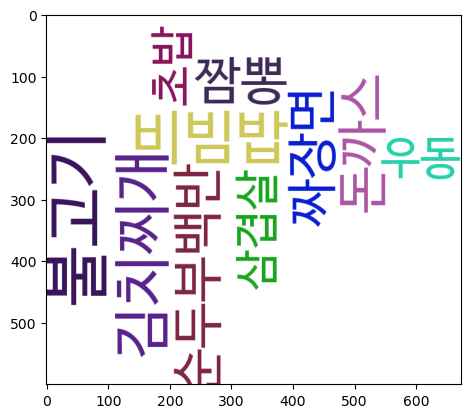

In [58]:
import matplotlib.pyplot 
import matplotlib.image
img=matplotlib.image.imread('wordcloud.png')
imgplot=matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

## word cloud

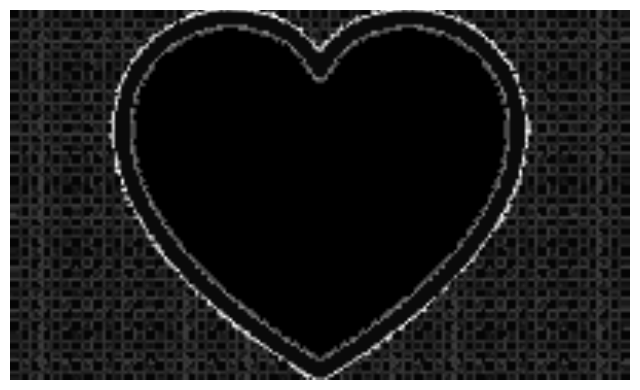

In [59]:
from PIL import Image
import matplotlib.pyplot as plt
mask=np.array(Image.open('./images.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
# wordcloud 생성
# 문자열 생성
text = ''
for t in range(8):
	text = text + 'Python '
for t in range(7):
	text = text + 'Java ' 
for t in range(7):
	text = text + 'C '
for t in range(8):
	text = text + 'JavaScript '
for t in range(5):
	text = text + 'C# '
for t in range(3):
	text = text + 'Ruby '
for t in range(2):
	text = text + 'scala '
for t in range(6):
	text = text + 'PHP '



In [61]:
for t in range(3):
	text = text + 'Swift '
for t in range(3):
	text = text + 'Kotlin '
#제거할 단어 설정
stopwords = set(STOPWORDS)
stopwords.add("Kotlin")
#워드 클라우드 만들기
wordcloud = WordCloud(background_color='white', max_words=2000, mask=mask,
stopwords = stopwords)
wordcloud = wordcloud.generate(text)
wordcloud.words_


NameError: name 'STOPWORDS' is not defined

In [ ]:
#워드 클라우드 화면 출력
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'wordcloud' is not defined

<Figure size 1200x1200 with 0 Axes>

## 동아일보에서 검색한 내용을 가지고 wordcloud 만들기

In [62]:
import requests
from urllib.parse import quote

In [66]:
# html 파싱을 위한 패키지
from bs4 import BeautifulSoup
keyword=input("검색어: ")
target_URL=f"https://www.donga.com/news/search?p=1&query={keyword}&check_news=92&more=1&sorting=1&search_date=1&v1=&v2="
source_code=requests.get(target_URL)
print(source_code.text)

<!doctype html>
<html lang="ko">
<head>
<title>뉴스｜검색결과｜동아일보</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="description" content="대한민국을 대표하는 정론지 동아일보는 디지털 창인 동아닷컴과 함께 공정하고 정확한 뉴스로 독자 여러분과 더 나은 미래를 만들어 나가겠습니다." />
<meta name="writer" content="동아닷컴" />
<meta name="facebook-domain-verification" content="nyedn3qpatz7zur9vbmms5epehnszw" />
<meta name='referrer' content='unsafe-url'>

<link rel="image_src" href="https://image.donga.com/pc/2022/images/common/donga_icon.jpg" />
<link rel="canonical" href="https://www.donga.com/news/search" />

<link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_sub.css?t=20230821' /><link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_search.css?t=20230821' />

<link rel="stylesheet" type="text/css" href="https://image.donga.com/donga/css.v.2.0/slick.css" />
<script async src='https://securepubad

In [68]:
# html 파싱을 위한 패키지
from bs4 import BeautifulSoup
keyword=input("검색어: ")
target_URL="https://www.donga.com/news/search?p=1&query="+quote(keyword)+"&check_news=92&more=1&sorting=1&search_date=1&v1=&v2="
source_code=requests.get(target_URL)
print(source_code.text)

<!doctype html>
<html lang="ko">
<head>
<title>뉴스｜검색결과｜동아일보</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="description" content="대한민국을 대표하는 정론지 동아일보는 디지털 창인 동아닷컴과 함께 공정하고 정확한 뉴스로 독자 여러분과 더 나은 미래를 만들어 나가겠습니다." />
<meta name="writer" content="동아닷컴" />
<meta name="facebook-domain-verification" content="nyedn3qpatz7zur9vbmms5epehnszw" />
<meta name='referrer' content='unsafe-url'>

<link rel="image_src" href="https://image.donga.com/pc/2022/images/common/donga_icon.jpg" />
<link rel="canonical" href="https://www.donga.com/news/search" />

<link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_sub.css?t=20230821' /><link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_search.css?t=20230821' />

<link rel="stylesheet" type="text/css" href="https://image.donga.com/donga/css.v.2.0/slick.css" />
<script async src='https://securepubad

In [71]:
# html parsing

from bs4 import BeautifulSoup
keyword=input("검색어: ")
target_URL=f"https://www.donga.com/news/search?p=1&query={keyword}&check_news=92&more=1&sorting=1&search_date=1&v1=&v2="
source_code=requests.get(target_URL)
print(source_code.text)


bs=BeautifulSoup(source_code.text,'html.parser')

# parsing
tags=bs.select('#content > div.sch_cont > div.schcont_wrap > div > div.cntPageBox > div > span')# 선택자는 
print(tags)


<!doctype html>
<html lang="ko">
<head>
<title>뉴스｜검색결과｜동아일보</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="description" content="대한민국을 대표하는 정론지 동아일보는 디지털 창인 동아닷컴과 함께 공정하고 정확한 뉴스로 독자 여러분과 더 나은 미래를 만들어 나가겠습니다." />
<meta name="writer" content="동아닷컴" />
<meta name="facebook-domain-verification" content="nyedn3qpatz7zur9vbmms5epehnszw" />
<meta name='referrer' content='unsafe-url'>

<link rel="image_src" href="https://image.donga.com/pc/2022/images/common/donga_icon.jpg" />
<link rel="canonical" href="https://www.donga.com/news/search" />

<link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_sub.css?t=20230821' /><link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_search.css?t=20230821' />

<link rel="stylesheet" type="text/css" href="https://image.donga.com/donga/css.v.2.0/slick.css" />
<script async src='https://securepubad

In [76]:
tags=bs.select('#content > div.sch_cont > div.schcont_wrap > div > div.cntPageBox > div > span')# 선택자는 
count=int(tags[0].getText()[0:-1].replace(',','')) # , 를 replace로 지워버리기. 

In [80]:
# 실제 크롤링할 기사 건수 입력받기
read_cnt=int(input('읽을 기사 건수: '))
if read_cnt>=count:
	read_cnt=count
# 읽을 페이지 개수 생성
page_num=int(read_cnt/15+0.95) # 소수부분을 처리하기 위해 0.95를 더해서 나타냄.
print(page_num)

2


In [100]:
keyword=input("검색어")
target_URL=f"https://www.donga.com/news/search?p=1&query={keyword}&check_news=92&more=1&sorting=1&search_date=1&v1=&v2="
source_code=requests.get(target_URL)

bs=BeautifulSoup(source_code.text,'html.parser')

# parsing
tags=bs.select('#content > div.sch_cont > div.schcont_wrap > div > div.cntPageBox > div > span')# 선택자는 
count=int(tags[0].getText()[0:-1].replace(',','')) # , 를 replace로 지워버리기. 




In [102]:

# 실제 크롤링할 기사 건수 입력받기
read_cnt=int(input('읽을 기사 건수: '))
if read_cnt>=count:
	read_cnt=count
# 읽을 페이지 개수 생성
page_num=int(read_cnt/15+0.95) # 소수부분을 처리하기 위해 0.95를 더해서 나타냄.

# 다운 받은 텍스트를 저장할 파일을 개방
output_file=open(keyword+'txt','w',encoding='utf-8')


for i in range(page_num):
	current_p=(1+i*15)
	target_URL=f"https://www.donga.com/news/search?p={current_p}&query={keyword}&check_news=92&more=1&sorting=1&search_date=1&v1=&v2="
	
	source_code=requests.get(target_URL)
	# 기사의 링크 가져오기
	bs=BeautifulSoup(source_code.text,'html.parser')
	links=bs.select("span.tit > a")
	for i in links:
		title_link=i['href']
		source_code=requests.get(title_link)
		bs=BeautifulSoup(source_code.text,'html.parser')
		articles=bs.select("#text")
		if articles !=None:
			for article in articles:
				string_item=str(article.find_all(text=True))
				output_file.write(string_item)


In [104]:
# 한글 형태소 분석기를 활용해 한글 텍스트를 추출
from konlpy.tag import Twitter
open_text_file=open(keyword+"txt",'r',encoding='utf-8')
text=open_text_file.read()
spliter=Twitter()
nouns=spliter.nouns(text)
open_text_file.close()
print(nouns)

['대기', '등록', '네이버', '대화', '인공', '지능', '서비스', '바', '베타', '버전', '홈페이지', '접속', '이', '검정', '버튼', '버튼', '대기', '등록', '절차', '순차', '바', '가입', '수', '가입', '시점', '등록', '메일', '주소', '안내', '메일', '발송', '문구', '등장', '네이버', '한국어', '특화된', '초', '거대', '생', '성형', '하이퍼', '바', '그', '기반', '바', '를', '공개', '바', '를', '체험', '기자', '행렬', '이어진', '것', '네이버', '서비스', '초기', '안정화', '위해', '바', '가입자', '수', '제한', '바', '한국', '챗', '바드', '를', '표방', '만큼', '한국어', '구사', '특장점', '대기', '바', '사투리', '신조어', '밈', '고난', '질문', '척척', '답변', '제주', '사투리', '여름', '관', '문장', '달라', '질문', '바', '여름', '렌', '허난', '부', '도롱', '헌', '해수욕장', '최고', '여름', '해수욕장', '최고다', '여름', '넨', '허난', '물놀이', '허젠', '바다', '이영', '계곡', '이영', '사람', '덜', '모', '여름', '물놀이', '위해', '바다', '계곡', '사람', '등', '제주', '사투리', '제대로', '이해', '듯', '문장', '생', '눈광', '뜻', '바', '바', '달리', '챗', '버전', '눈광', '이', '무슨', '뜻', '질문', '정답', '거리', '답변', '바', '캡처', '눈광', '이', '무슨', '뜻', '뉴진스', '입', '보이', '사용', '고', '때', '바', '각각', '맑은', '눈', '광', '앞', '글자', '지은', '초롱초롱', '맑은', '눈', '똑', '표정', '호감', '인상', '어딘'

In [106]:
# 단어 개수와 등장 횟수 확인
import nltk
ko=nltk.Text(nouns,name=keyword)
print('전체 단어의 개수: ',len(ko.tokens))
print('전체 단어 개수 - 중복 제거:', len(set(ko.tokens)))
print(ko.vocab())

전체 단어의 개수:  17904
전체 단어 개수 - 중복 제거: 3572
<FreqDist with 3572 samples and 17904 outcomes>


In [110]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
mpl.rcParams['axes.unicode_minus'] = False


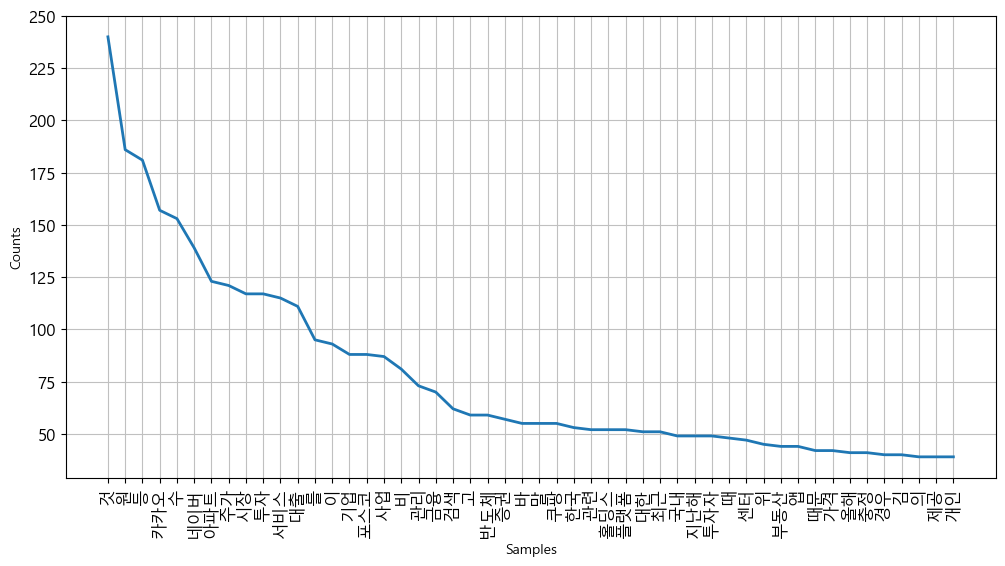

In [111]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [114]:
# 불용어 제거
stop_words=input()
stop_words=stop_words.split(' ')
ko2 = [each_word for each_word in ko if each_word not in stop_words]
print(ko2)

['대기', '등록', '네이버', '대화', '인공', '지능', '서비스', '바', '베타', '버전', '홈페이지', '접속', '검정', '버튼', '버튼', '대기', '등록', '절차', '순차', '바', '가입', '가입', '시점', '등록', '메일', '주소', '안내', '메일', '발송', '문구', '등장', '네이버', '한국어', '특화된', '초', '거대', '생', '성형', '하이퍼', '바', '기반', '바', '공개', '바', '체험', '기자', '행렬', '이어진', '네이버', '서비스', '초기', '안정화', '위해', '바', '가입자', '제한', '바', '한국', '챗', '바드', '표방', '한국어', '구사', '특장점', '대기', '바', '사투리', '신조어', '밈', '고난', '질문', '척척', '답변', '제주', '사투리', '여름', '관', '문장', '달라', '질문', '바', '여름', '렌', '허난', '부', '도롱', '헌', '해수욕장', '최고', '여름', '해수욕장', '최고다', '여름', '넨', '허난', '물놀이', '허젠', '바다', '이영', '계곡', '이영', '사람', '덜', '여름', '물놀이', '위해', '바다', '계곡', '사람', '제주', '사투리', '제대로', '이해', '듯', '문장', '생', '눈광', '뜻', '바', '바', '달리', '챗', '버전', '눈광', '뜻', '질문', '정답', '거리', '답변', '바', '캡처', '눈광', '뜻', '뉴진스', '입', '보이', '사용', '고', '바', '맑은', '눈', '광', '앞', '글자', '지은', '초롱초롱', '맑은', '눈', '똑', '표정', '호감', '인상', '어딘', '광기', '사람', '걸그룹', '뉴진스', '노래', '입', '보이', '유래', '밈', '상황', '뉴진스', '입', '보이', '요', '말',

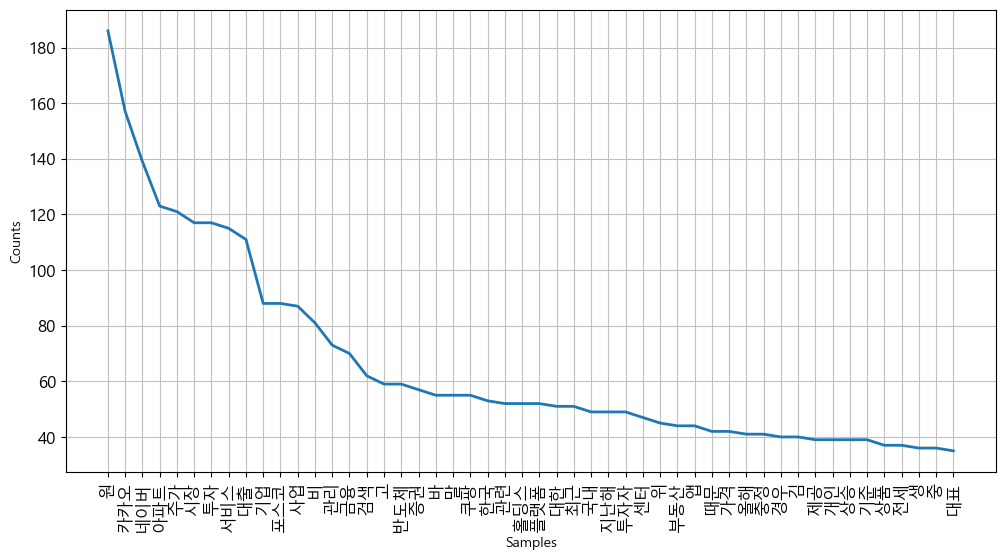

In [117]:
ko=nltk.Text(ko2,name=keyword)
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

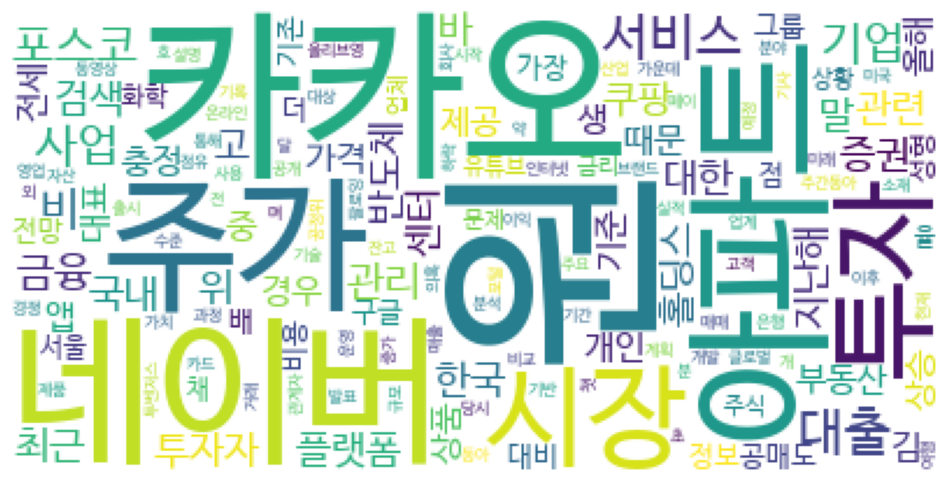

In [123]:
from wordcloud import WordCloud
data=ko.vocab().most_common(150)

wordcloud = WordCloud(font_path = './python_machine_learning/data/NanumBarunGothic.ttf',
relative_scaling = 0.5,
background_color='white',
).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
mask = np.array(Image.open('./python_machine_learning/data/appleBar.png'))
data = ko.vocab().most_common(100)
wordcloud = WordCloud(font_path='./python_machine_learning/data/NanumBarunGothic.ttf',
relative_scaling = 0.5,
background_color='white',
mask=mask,
).generate_from_frequencies(dict(data))
%matplotlib inline
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 뉴스 텍스트 분류

In [10]:
from sklearn.datasets import fetch_20newsgroups

news_data=fetch_20newsgroups(subset='all',random_state=42)

In [11]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [12]:
# 분포 확인
import pandas as pd
# 분포 확인 - 분포가 한쪽으로 치우치게 되면 데이터를 층화추출을 할 것인지, Oversampling 할것인지,
# undersampling, log 변환 할것인지 선택해야한다. 
print('target 클래스의 값과 분포도',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 ',news_data.target_names)

target 클래스의 값과 분포도 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
# 데이터 확인

print(news_data.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [14]:
# 데이터 가져오기

# headers 나 footers, quotes를 제거하고 가져오기
train_news=fetch_20newsgroups(subset='train',remove=('headers','footers','quotes'),random_state=42)

# 훈련 데이터 생성
X_train=train_news.data
y_train=train_news.target # 실제 데이터
print(type(X_train)) # 문자열 list

<class 'list'>


In [15]:
# headers 나 footers, quotes를 제거하고 가져오기
test_news=fetch_20newsgroups(subset='test',remove=('headers','footers','quotes'),random_state=42)

# 훈련 데이터 생성
X_test=test_news.data
y_test=test_news.target # 실제 데이터
print(type(X_test)) # 문자열 list

<class 'list'>


### feature-vectorize

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# 단어가 등장한 개수 기반의 벡터화를 위한 인스턴스 생성
cnt_vect=CountVectorizer()
# 벡터화
cnt_vect.fit(X_train)
X_train_cnt_vect=cnt_vect.transform(X_train)
print(type(X_train_cnt_vect))

X_test_cnt_vect=cnt_vect.transform(X_test)

<class 'scipy.sparse._csr.csr_matrix'>


In [19]:
print(X_train_cnt_vect)

  (0, 9843)	1
  (0, 11174)	1
  (0, 16809)	1
  (0, 17936)	1
  (0, 18915)	2
  (0, 21987)	1
  (0, 23480)	1
  (0, 24160)	1
  (0, 24635)	1
  (0, 25492)	1
  (0, 25590)	1
  (0, 25775)	4
  (0, 30074)	1
  (0, 31990)	1
  (0, 34809)	1
  (0, 34810)	1
  (0, 35974)	1
  (0, 37287)	1
  (0, 37335)	1
  (0, 41715)	2
  (0, 41724)	1
  (0, 41979)	1
  (0, 45885)	1
  (0, 46814)	1
  (0, 48754)	2
  :	:
  (11313, 57131)	1
  (11313, 60560)	1
  (11313, 61975)	1
  (11313, 62086)	1
  (11313, 64435)	1
  (11313, 66242)	1
  (11313, 66857)	2
  (11313, 68080)	1
  (11313, 68409)	1
  (11313, 68997)	1
  (11313, 70066)	1
  (11313, 71786)	1
  (11313, 71992)	1
  (11313, 78365)	1
  (11313, 81742)	1
  (11313, 81792)	1
  (11313, 82660)	1
  (11313, 84605)	1
  (11313, 85524)	1
  (11313, 87730)	1
  (11313, 89465)	1
  (11313, 89804)	1
  (11313, 90644)	1
  (11313, 96497)	1
  (11313, 96707)	1


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf=LogisticRegression(solver='lbfgs',max_iter=1000)

lr_clf.fit(X_train_cnt_vect,y_train)
pred=lr_clf.predict(X_test_cnt_vect)

print("정확도",accuracy_score(y_test,pred))

정확도 0.5967870419543282


# TD-IDF 이용

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,2),max_df=300)
tdidf_vect.fit(X_train)
X_train_tdidf_vect=tdidf_vect.transform(X_train)
X_test_tdidf_vect=tdidf_vect.transform(X_test)

lr_clf=LogisticRegression(solver='lbfgs',max_iter=1000)

lr_clf.fit(X_train_tdidf_vect,y_train)
pred=lr_clf.predict(X_test_tdidf_vect)

print("정확도",accuracy_score(y_test,pred))

NameError: name 'LogisticRegression' is not defined

In [17]:
print(X_train_tdidf_vect)

  (0, 936087)	0.14969553397166924
  (0, 917607)	0.14969553397166924
  (0, 917579)	0.07948393821473353
  (0, 830072)	0.14969553397166924
  (0, 830071)	0.14969553397166924
  (0, 790860)	0.12634113064869967
  (0, 790852)	0.09494034242993067
  (0, 788246)	0.14969553397166924
  (0, 788177)	0.09471366110991117
  (0, 777146)	0.14969553397166924
  (0, 757480)	0.14969553397166924
  (0, 757372)	0.08475919096334925
  (0, 741992)	0.14969553397166924
  (0, 741909)	0.07370288887108908
  (0, 718179)	0.14969553397166924
  (0, 698270)	0.13893276414900424
  (0, 669263)	0.14969553397166924
  (0, 669252)	0.0936273864954975
  (0, 561836)	0.13893276414900424
  (0, 561726)	0.07561923105982278
  (0, 517419)	0.14339971722151695
  (0, 517249)	0.14969553397166924
  (0, 517160)	0.07842391448510047
  (0, 491069)	0.13893276414900424
  (0, 491047)	0.08017415827503177
  :	:
  (11313, 503723)	0.09570094895156386
  (11313, 477759)	0.1449853513825193
  (11313, 477740)	0.10825532449192052
  (11313, 464965)	0.144985351382

# 감성분석

## 나이브 베이즈를 이용한 감성 분석

In [1]:
train=[('I like you','pos'),('i do not like you','neg'),
('i hate you','neg'),('i do not hate you','pos'),
('i love you','pos'),('i do not love you','neg')
]
#  등장한 모든 단어 찾기
from nltk.tokenize import word_tokenize
import nltk

#단어 단위로 분할해서 등장한 단어 전부 추출

all_words=set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
# sententce -> word -> word.lower()



In [2]:
# 분류기 만들기

# 단어 토큰화
# 각 문장에 단어의 포함 여부를 만들고 감성을 기록. 
t=[({word:(word in word_tokenize(x[0])) for word in all_words},x[1]) for x in train]
print(t)

[({'like': True, 'i': False, 'love': False, 'do': False, 'you': True, 'not': False, 'hate': False}, 'pos'), ({'like': True, 'i': True, 'love': False, 'do': True, 'you': True, 'not': True, 'hate': False}, 'neg'), ({'like': False, 'i': True, 'love': False, 'do': False, 'you': True, 'not': False, 'hate': True}, 'neg'), ({'like': False, 'i': True, 'love': False, 'do': True, 'you': True, 'not': True, 'hate': True}, 'pos'), ({'like': False, 'i': True, 'love': True, 'do': False, 'you': True, 'not': False, 'hate': False}, 'pos'), ({'like': False, 'i': True, 'love': True, 'do': True, 'you': True, 'not': True, 'hate': False}, 'neg')]


In [3]:
# 텍스트 분류를 위한 나이브 베이즈 분류기를 이용해서 모델을 생성.
classifier=nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                      do = False             pos : neg    =      1.7 : 1.0
                      do = True              neg : pos    =      1.7 : 1.0
                     not = False             pos : neg    =      1.7 : 1.0
                     not = True              neg : pos    =      1.7 : 1.0
                       i = True              neg : pos    =      1.4 : 1.0
                    hate = False             neg : pos    =      1.0 : 1.0
                    hate = True              neg : pos    =      1.0 : 1.0
                    like = False             neg : pos    =      1.0 : 1.0
                    like = True              neg : pos    =      1.0 : 1.0


In [4]:
# 예측

test_sentence='i do not like jessica'

test_sent_features={word.lower():(word in word_tokenize(test_sentence.lower())) for word in all_words}
print(test_sent_features)

{'like': True, 'i': True, 'love': False, 'do': True, 'you': False, 'not': True, 'hate': False}


In [5]:
print(classifier.classify(test_sent_features))

neg


### 한글 감성 분석

In [6]:
train=[('나는 당신을 사랑합니다','pos'),('나는 당신을 사랑하지 않아요','neg'),
	   ('나는 당신을 만나는 것이 지루합니다','neg'),('나는 당신이 좋아요',"pos"),
	   ('나는 노는것이 좋다.','pos'),('나는 일하는 것이 즐겁다','pos'),
	   ('맛있는 것을 먹으면 행복하다','pos'),('오늘은 서접에 갈 예정이다','pos'),
	   ('한경아 살좀 빼자. 독하게 가자','neg')
	   ]
all_words=set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
print(all_words)

{'나는', '오늘은', '사랑하지', '갈', '것을', '서접에', '좋다', '것이', '노는것이', '당신을', '당신이', '맛있는', '먹으면', '빼자', '일하는', '.', '행복하다', '한경아', '좋아요', '않아요', '사랑합니다', '독하게', '살좀', '가자', '지루합니다', '예정이다', '즐겁다', '만나는'}


In [8]:
from konlpy.tag import Twitter

twitter=Twitter()

def tokenize(doc):
	return ["/".join(t) for t in twitter.pos(doc,norm=True,stem=True)]

train_doc=[(tokenize(row[0]),row[1]) for row in train]

print(train_doc)

[(['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective'], 'pos'), (['나/Noun', '는/Josa', '놓다/Verb', '좋다/Adjective', './Punctuation'], 'pos'), (['나/Noun', '는/Josa', '일/Noun', '하다/Verb', '것/Noun', '이/Josa', '즐겁다/Adjective'], 'pos'), (['맛있다/Adjective', '것/Noun', '을/Josa', '먹다/Verb', '행복하다/Adjective'], 'pos'), (['오늘/Noun', '은/Josa', '서/Modifier', '접/Noun', '에/Josa', '갈다/Verb', '예정/Noun', '이다/Josa'], 'pos'), (['한경/Noun', '아/Josa', '살좀/Noun', '빼다/Verb', './Punctuation', '독하다/Adjective', '가다/Verb'], 'neg')]


In [9]:
# 단어만 추출하기
tokens=[t for d in train_doc for t in d[0]]
print(tokens)

['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '않다/Verb', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective', '나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective', '나/Noun', '는/Josa', '놓다/Verb', '좋다/Adjective', './Punctuation', '나/Noun', '는/Josa', '일/Noun', '하다/Verb', '것/Noun', '이/Josa', '즐겁다/Adjective', '맛있다/Adjective', '것/Noun', '을/Josa', '먹다/Verb', '행복하다/Adjective', '오늘/Noun', '은/Josa', '서/Modifier', '접/Noun', '에/Josa', '갈다/Verb', '예정/Noun', '이다/Josa', '한경/Noun', '아/Josa', '살좀/Noun', '빼다/Verb', './Punctuation', '독하다/Adjective', '가다/Verb']


In [10]:
# 분류기 만들기
def term_exists(doc):
	return {word: (word in set(doc)) for word in tokens}
train_xy = [(term_exists(d), c) for d,c in train_doc]
print(train_xy)
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

[({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': False, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '놓다/Verb': False, './Punctuation': False, '일/Noun': False, '즐겁다/Adjective': False, '맛있다/Adjective': False, '먹다/Verb': False, '행복하다/Adjective': False, '오늘/Noun': False, '은/Josa': False, '서/Modifier': False, '접/Noun': False, '에/Josa': False, '갈다/Verb': False, '예정/Noun': False, '이다/Josa': False, '한경/Noun': False, '아/Josa': False, '살좀/Noun': False, '빼다/Verb': False, '독하다/Adjective': False, '가다/Verb': False}, 'pos'), ({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': True, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '놓다/Verb': False, './Punctuation': False, '일/Noun': False, '즐겁다/Adjective': False, '맛있다/Adjective': False, '먹다/Verb': False, '행복하다/Adjective': F

In [11]:
classifier=nltk.NaiveBayesClassifier.train(train_xy)

classifier.show_most_informative_features()

Most Informative Features
           ./Punctuation = True              neg : pos    =      1.8 : 1.0
                 당신/Noun = True              neg : pos    =      1.8 : 1.0
                 사랑/Noun = True              neg : pos    =      1.8 : 1.0
                  을/Josa = True              neg : pos    =      1.8 : 1.0
                 당신/Noun = False             pos : neg    =      1.7 : 1.0
                  을/Josa = False             pos : neg    =      1.7 : 1.0
                 가다/Verb = False             pos : neg    =      1.5 : 1.0
           독하다/Adjective = False             pos : neg    =      1.5 : 1.0
                만나다/Verb = False             pos : neg    =      1.5 : 1.0
                 빼다/Verb = False             pos : neg    =      1.5 : 1.0


In [12]:
test_sentence=[("나는 김지민")]
test_docs=twitter.pos(test_sentence[0])
test_sent_features={word:(word in tokens) for word in test_docs}
print(classifier.classify(test_sent_features))

pos


# 텍스트 군집

In [16]:
import glob,os

path="C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics"
all_files=glob.glob(os.path.join(path,"*.data"))
print(all_files)

['C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\accuracy_garmin_nuvi_255W_gps.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\bathroom_bestwestern_hotel_sfo.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\battery-life_amazon_kindle.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\battery-life_ipod_nano_8gb.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\battery-life_netbook_1005ha.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\buttons_amazon_kindle.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\comfort_honda_accord_2008.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\comfort_toyota_camry_2007.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\directions_garmin_nuvi_255W_gps.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\display_garmin_nuvi_255W_gps.txt.data', 'C:\\Users\\USER\\Desktop\\OpinosisDataset1.0\\topics\\eyesig

In [17]:
import pandas as pd

filename_list = []
opinion_text = []
# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Windows에서 수행시에는 아래 /를 \\ 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0] # 확장자 제거.

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...
5,buttons_amazon_kindle,...
6,comfort_honda_accord_2008,...
7,comfort_toyota_camry_2007,...
8,directions_garmin_nuvi_255W_gps,...
9,display_garmin_nuvi_255W_gps,...


### 피처 벡터화

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 구두점 제거. 
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
# 토큰화 
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

c:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [19]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
1,bathroom_bestwestern_hotel_sfo,...,0
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1


In [21]:
(document_df[document_df['cluster_label']==2].sort_values(by='filename'))


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
5,buttons_amazon_kindle,...,2
8,directions_garmin_nuvi_255W_gps,...,2
9,display_garmin_nuvi_255W_gps,...,2
10,eyesight-issues_amazon_kindle,...,2
11,features_windows7,...,2
12,fonts_amazon_kindle,...,2
23,navigation_amazon_kindle,...,2
33,satellite_garmin_nuvi_255W_gps,...,2
34,screen_garmin_nuvi_255W_gps,...,2


### 3개 군집 실행

In [22]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
48,updates_garmin_nuvi_255W_gps,...,0
44,speed_windows7,...,0
43,speed_garmin_nuvi_255W_gps,...,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0
41,size_asus_netbook_1005ha,...,0
36,screen_netbook_1005ha,...,0
35,screen_ipod_nano_8gb,...,0
34,screen_garmin_nuvi_255W_gps,...,0
33,satellite_garmin_nuvi_255W_gps,...,0


### 단어의 중심거리 확인

In [23]:
# 행은 개별 군집을 의미하며 열은 개별 피처를 의미
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


### 군집별 핵심 단어와 위치 그리고 파일명 출력

In [24]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1] # 값이 큰 순서대로 array의 인덱스를 제공.
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
		# 중요 피처 추출 
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [25]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [26]:
feature_names = tfidf_vect.get_feature_names_out() # feature 이름 전부 가져오기

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_2008', 'interior_toyota_camry_2007', 'mileage_honda_accord_2008', 'performance_honda_accord_2008']
####### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_h

# 문장 유사도 측정

## 코사인 유사도 측정

In [27]:
def cos_similarity(v1,v2):
	dot_product=np.dot(v1,v2)
	l2_norm=(np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
	similarity=dot_product/l2_norm

	return similarity

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc_lis=['if you take the blue pill, the story ends',
		'if you take the red pill, you stay in wonderland',
		"if you take the red pill, i'll show you how deep rabbit hole goes"]

tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_lis)
print(feature_vect_simple) # 하지만 희소행렬의 구조가 맞지 않는다. 


feature_vect_dense = feature_vect_simple.todense()
feature_vect_dense

import numpy as np

#첫번째 문장과 두번째 문장의 feature vector  추출, 1차원 변경
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

  (0, 2)	0.41556360057939173
  (0, 14)	0.41556360057939173
  (0, 9)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 16)	0.49087711375683185
  (0, 15)	0.24543855687841593
  (0, 18)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 17)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 13)	0.39624495215024286
  (1, 11)	0.3013544995034864
  (1, 9)	0.2340286519091622
  (1, 16)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 18)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3105497428978879
  (2, 4)	0.3105497428978879
  (2, 10)	0.3105497428978879
  (2, 1)	0.3105497428978879
  (2, 5)	0.3105497428978879
  (2, 12)	0.3105497428978879
  (2, 8)	0.3105497428978879
  (2, 11)	0.23618108403421342
  (2, 9)	0.18341568084777196
  (2, 16)	0.18341568084777196
  (2, 15)	0.18341568084777196
  (2, 18)	0.3668313616955439
  (2, 6)	0.18341568084777196


In [29]:
#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402
문장 1, 문장 3 Cosine 유사도: 0.315
문장 2, 문장 3 Cosine 유사도: 0.415


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# api를 이용한 코사인 유사도 측정. 
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.31512096]]


## 문서 군집의 코사인 유사도 측정

In [31]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
##### 비교 기준 문서명  comfort_honda_accord_2008  와 타 문서 유사도######
[[1.         0.83969704 0.15655631 0.33044002 0.25981841 0.16544257
  0.27569738 0.18050974 0.65502034 0.06229873]]


In [32]:
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[[i for i in range(8)]])
print(similarity_pair)

[[0.02315315 0.03787848 0.01383035 0.01725198 0.01973879 0.01873283
  1.         0.83969704]]


## 한글 문장 유사도 측정

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

from konlpy.tag import Okt

okt=Okt()
vectorizer=CountVectorizer(min_df=1)



In [34]:
contents = ['우리 과일 먹으로 가자',
                   '나는 고기를 좋아합니다',
                   '나는 공원에서 산책하는 것을 싫어합니다',
                   '안녕하세요 반갑습니다 그동안 잘 계셨어요']
contents_tokens = [okt.morphs(row) for row in contents]
print(contents_tokens)

[['우리', '과일', '먹으로', '가자'], ['나', '는', '고기', '를', '좋아합니다'], ['나', '는', '공원', '에서', '산책', '하는', '것', '을', '싫어합니다'], ['안녕하세요', '반갑습니다', '그동안', '잘', '계셨어요']]


In [39]:
# 토큰화 된 결과를 가지고 다시 문장을 생성
# feature-vectorize 때문에 . feature-vectorize는 문장을 가지고 실행하기 때문에 합쳐준다. 
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
print(contents_for_vectorize)

[' 우리 과일 먹으로 가자', ' 나 는 고기 를 좋아합니다', ' 나 는 공원 에서 산책 하는 것 을 싫어합니다', ' 안녕하세요 반갑습니다 그동안 잘 계셨어요']


In [44]:
### 훈련 데이터의 차원 확인
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
print(num_samples, num_features)

### feature의 확인
print(vectorizer.get_feature_names_out())

### feature의 벡터 값 확인
print(X.toarray().transpose())

4 15
['가자' '계셨어요' '고기' '공원' '과일' '그동안' '먹으로' '반갑습니다' '산책' '싫어합니다' '안녕하세요' '에서'
 '우리' '좋아합니다' '하는']
[[1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [45]:
### 테스트 데이터 확인
new_post = ['우리 과이 먹으로 갖']
new_post_tokens = [okt.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
print(new_post_for_vectorize)


[' 우리 과 이 먹으로 갖']


In [46]:
### 샘플 데이터 확인
new_post_vec = vectorizer.transform(new_post_for_vectorize)
print(new_post_vec.toarray())


[[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]]


In [47]:
### 샘플 데이터와 훈련 데이터 거리 확인
import scipy as sp

#거리 구해주는 함수
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

best_doc = None
best_dist = 65535
best_i = None

In [48]:
for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== %i 번째 문장과의 거리:%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== 0 번째 문장과의 거리:1.41   : 우리 과일 먹으로 가자
== 1 번째 문장과의 거리:2.00   : 나는 고기를 좋아합니다
== 2 번째 문장과의 거리:2.65   : 나는 공원에서 산책하는 것을 싫어합니다
== 3 번째 문장과의 거리:2.45   : 안녕하세요 반갑습니다 그동안 잘 계셨어요


In [49]:
### 가장 가까운 거리의 훈련 데이터 거리 확인
print("가장 가까운 문장은 %i번째 이고 거리는 %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])


가장 가까운 문장은 0번째 이고 거리는 1.41
--> ['우리 과이 먹으로 갖']
----> 우리 과일 먹으로 가자
